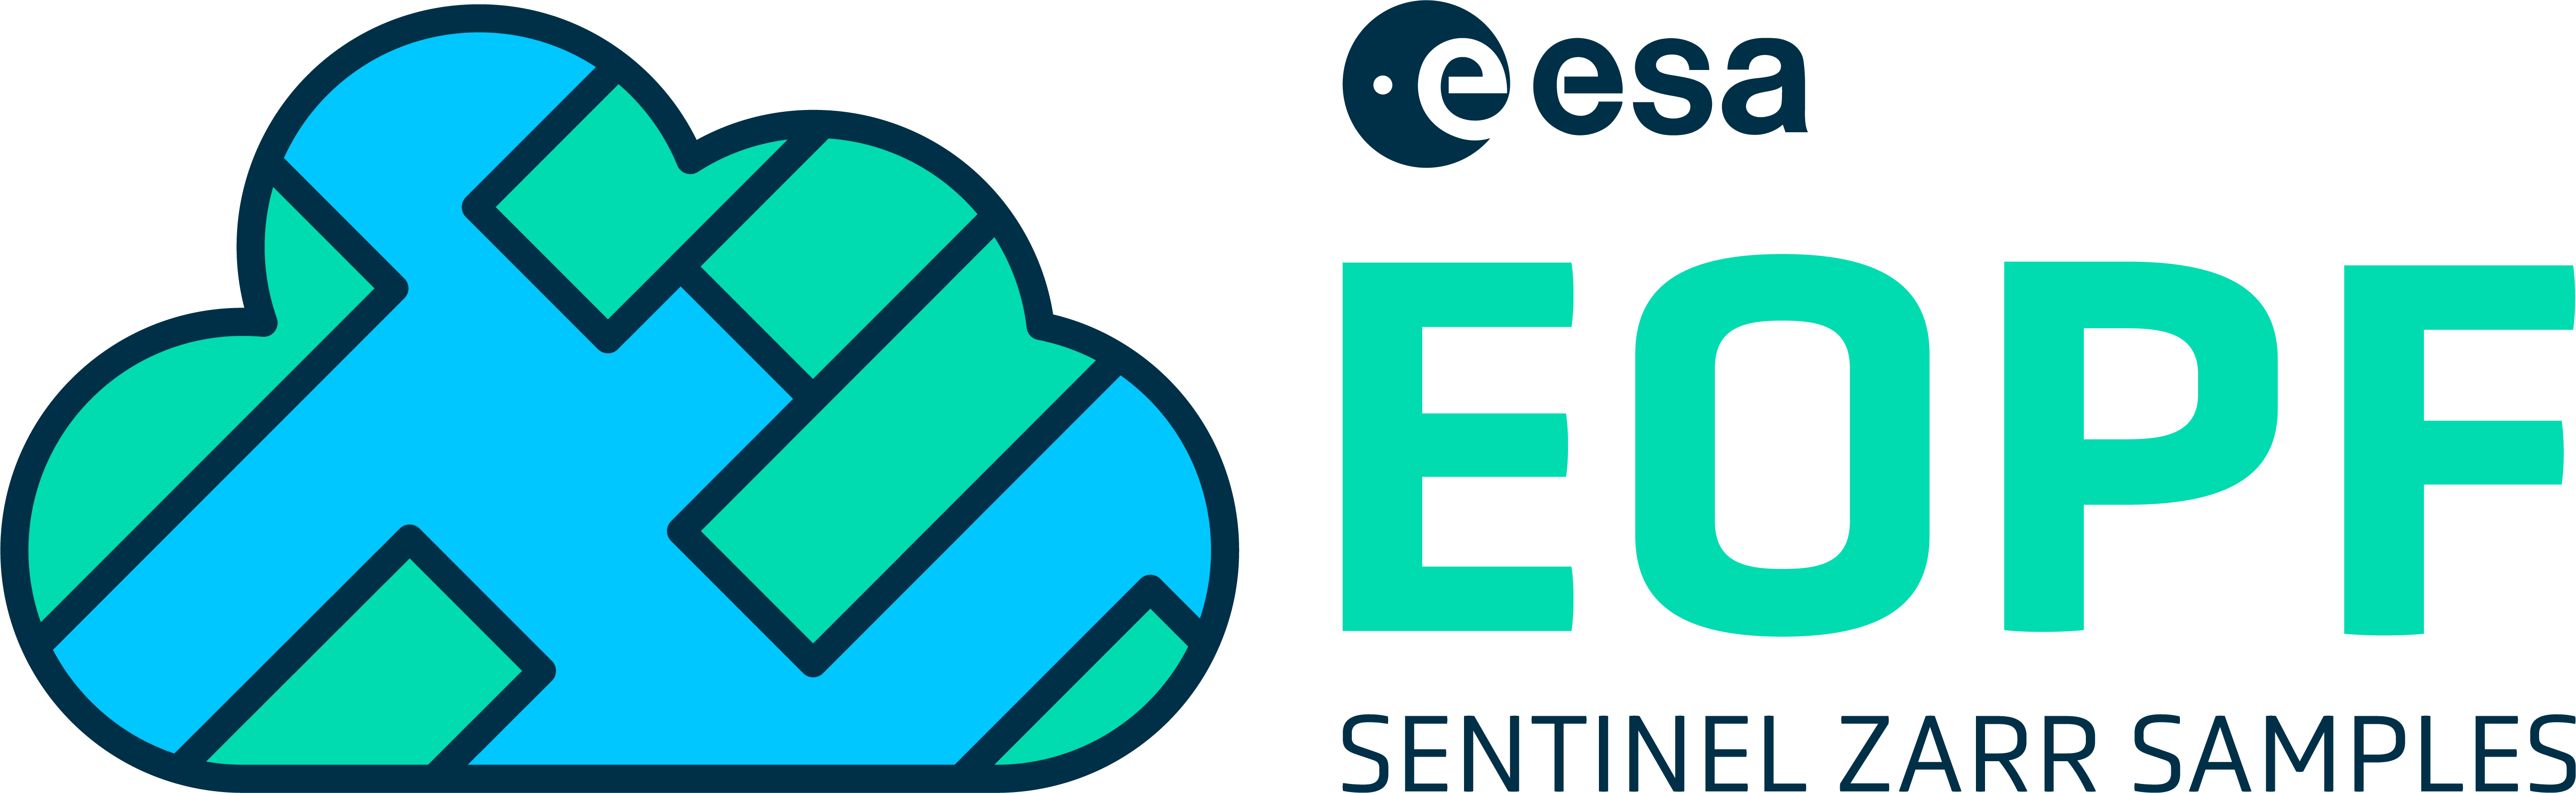

# Visualise EOPF ZARR Sentinel 2 files using GDAL

## Import Libraries

- GDAL: Geospatial Data Abstraction Library
- Numpy: Numerical Python
- Matplotlib: Python 2D plotting library

In [9]:
from osgeo import gdal

**Build the GDAL connection to the ZARR file**

Note: Always add **'ZARR:"/vsicurl/your_zarr_file_url'** to the ZARR file path

In [41]:
dsn = (
    'ZARR:"/vsicurl/https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2B_MSIL1C_20250113T103309_N0511_R108_T32TLQ_20250113T122458.zarr"'
)

**Open the dataset using GDAL’s Zarr driver.**

In [42]:
ds = gdal.Open(dsn, gdal.GA_ReadOnly)
if ds is None:
    raise RuntimeError("Failed to open the Zarr dataset with GDAL.")

In [43]:
# Check if the dataset was opened successfully
if ds is not None:
    print("Dataset opened successfully!")
    # Print metadata
    print(ds.GetMetadata())
else:
    print("Failed to open dataset.")

Dataset opened successfully!
{}


In [44]:
subds = ds.GetSubDatasets()
for idx, s in enumerate(subds):
    print(idx, s)

0 ('ZARR:"/vsicurl/https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2B_MSIL1C_20250113T103309_N0511_R108_T32TLQ_20250113T122458.zarr":/conditions/geometry/angle', 'Array /conditions/geometry/angle')
1 ('ZARR:"/vsicurl/https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2B_MSIL1C_20250113T103309_N0511_R108_T32TLQ_20250113T122458.zarr":/conditions/geometry/band', 'Array /conditions/geometry/band')
2 ('ZARR:"/vsicurl/https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2B_MSIL1C_20250113T103309_N0511_R108_T32TLQ_20250113T122458.zarr":/conditions/geometry/detector', 'Array /conditions/geometry/detector')
3 ('ZARR:"/vsicurl/https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2B_MSIL1C_20250113T103309_N0511_R108_T32TLQ_20250113T122458.zarr":/conditions/geometry/x', 'Array /conditions/geometry/

## Zarr metadata extraction and interpretation with GDAL

In [61]:
open_subds = gdal.Open(subds[80][0], gdal.GA_ReadOnly)
if open_subds is None:
    raise RuntimeError("Failed to open the Zarr dataset with GDAL.")

In [68]:
open_subds.GetMetadata()

{'_eopf_attrs': '{ "add_offset": -0.1, "coordinates": [ "x", "y" ], "dimensions": [ "y", "x" ], "fill_value": 0, "scale_factor": 0.0001, "units": "digital_counts" }',
 'dtype': '<u2',
 'fill_value': '0',
 'long_name': 'TOA reflectance from MSI acquisition at spectral band b01 442.3 nm',
 'proj:bbox': '{300000,4890240,409800,5000040}',
 'proj:epsg': '32632',
 'proj:shape': '{1830,1830}',
 'proj:transform': '{60,0,300000,0,-60,5000040,0,0,1}',
 'proj:wkt2': 'PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting

**Get the raster band (assuming there is one band).**

In [62]:
band = open_subds.GetRasterBand(1)
width = band.XSize
height = band.YSize
print("Original dimensions: {} x {}".format(width, height))

Original dimensions: 1830 x 1830


**Read the /measurements/reflectance/r60m/b01 data into a numpy array.**

In [69]:
data = open_subds.GetRasterBand(1).ReadAsArray()
print("Decimated dimensions: {} x {}".format(data.shape[1], data.shape[0]))

Decimated dimensions: 1830 x 1830


**Plot the /measurements/reflectance/r60m/b01 data using Matplotlib.**

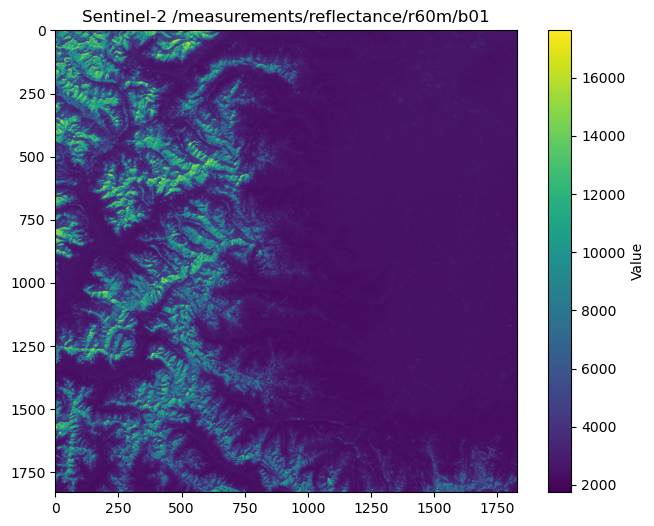

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(data)
plt.colorbar(label='Value')
plt.title('Sentinel-2 /measurements/reflectance/r60m/b01')
plt.show()